{'1110': 59, '1101': 70, '1111': 51, '1011': 69, '0111': 54, '0011': 71, '0000': 64, '0010': 53, '0110': 64, '1000': 64, '1100': 76, '0001': 65, '0100': 69, '1010': 70, '1001': 59, '0101': 66}


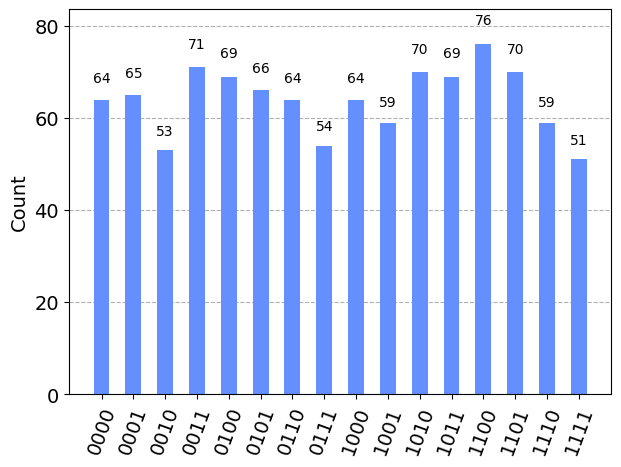

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, Aer, execute
from qiskit.circuit.library import GroverOperator
from qiskit.visualization import plot_histogram

# Define la base de datos cuántica
num_stars = 16 # Número de estrellas en la constelación
nqubits = 4 # Número de qubits por estado cuántico

qr = QuantumRegister(nqubits, 'q')
oracle_circuit = QuantumCircuit(qr, name='oracle')

# Define la base de datos cuántica
database = [[0, 0, 1, 0], [1, 1, 2, 0], [0, 2, 3, 1], [1, 3, 1, 0], [0, 4, 4, 2], [1, 5, 3, 1], [0, 6, 5, 3], [1, 7, 2, 2], [0, 8, 6, 4], [1, 9, 4, 2], [0, 10, 7, 5], [1, 11, 5, 3], [0, 12, 8, 6], [1, 13, 6, 4], [0, 14, 9, 7], [1, 15, 7, 5]]

# Define la función del oráculo
def oracle(circuit, qr):
    for i in range(nqubits):
        circuit.cx(qr[i], qr[nqubits])
    circuit.x(qr[nqubits])
    circuit.mct(qr[:-1], qr[nqubits])
    circuit.x(qr[nqubits])
    for i in range(nqubits):
        circuit.cx(qr[i], qr[nqubits])

# Construye el circuito de Grover
grover_circuit = QuantumCircuit(qr)
grover_circuit.h(qr)
grover_circuit.append(GroverOperator(oracle_circuit), qr)
grover_circuit.measure_all()

# Ejecuta el circuito de Grover para buscar la estrella más brillante
backend = Aer.get_backend('qasm_simulator')
result = execute(grover_circuit, backend).result()
counts = result.get_counts()
print(counts)
plot_histogram(counts)

